<a href="https://colab.research.google.com/github/umi-na/google_colab/blob/main/topic_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 #6: 데이터 시각화

Colab 실습 시작 전, 이 노트북의 **복사본을 자신의 구글 드라이브에 저장**함: Colab 메뉴에서 "File" >> "Save a Copy in Drive". "Save a Copy" 메뉴 선택 시 "Copy of topic#6.ipynb" 복사본이 구글 드라이브의 'Colab Notebook' 폴더에 저장됨. 그리고 본사본이 새 브라우저 창에 열림.

# 수업목표

* 기술통계분석 복습 (토픽 5)

* 데이터 시각화

# 데이터 소개

## 타이타닉 탑습객 데이터

* 본 수업에서도 [타이타닉 탑습객 데이터](https://drive.google.com/drive/folders/1KpfVquLkXBRByHmpwCvxHYpbpj7sebki?usp=sharing)를 활용하겠음.

* 탑습객 데이터를 다운받아 구글 드라이브에 업로드하여 사용하면 됨

* 탑습객 데이터의 자세한 설명은 [Wk#3 코랩](https://colab.research.google.com/drive/1rn0JqKKVeagdFY-DriMhqIiU2drUeEAg?usp=sharing) 참조


### 구글 드라이브 마운트

* 구글 드라이브에 업로드한 데이터를 사용하기 위해 드라이브를 마운트함

* 아래 그림처럼 (1) => (2) 순으로 클릭하면 드라이브가 마운트됨(자세한 설명은 [Wk#1 코랩](https://colab.research.google.com/drive/1-28UPcDO68IGnwZ0SeuG_jnvMQ--oL6E?usp=sharing) 참조)

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1L56f9PIcVxMCLjonPgqJl2PKzasw4TY8) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 구글 드라이브 폴더 경로 설정

* 아래 root_path의 스트링값은 파일이 있는 구글 드라이브 폴더 경로를 나타냄 

* 자신에게 맞게 구글 드라이브 폴더 경로를 변경하여 사용하면 됨

In [ ]:
root_path = '/content/drive/MyDrive/wk3_data'

* 아래 데이터는 타이타닉 데이터를 DataFrame으로 읽어와 보여주는 코드임

* 구글 드라이브 마운트 및 폴더 경로가 똑바로 설정되다면 오류 없이 실행됨


In [ ]:
import pandas as pd
from os import path

def getTitanicData():
  return pd.read_csv(path.join(root_path,'titanic.csv'))

df = getTitanicData()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,113803,53.1000,C123,S
4,5,0,3,male,35.0,373450,8.0500,NaN,S


## 비행기 탑승객 데이터

* 본 데이터는 1960~1949년까지 매월 비행기 탑승객 수 정보를 본 수업 내용에 맞게 수정한 데이터임

* seaborn이라는 파이썬 시각화 라이브러리에서 기본으로 제공함. 따라서 데이터를 다운 받아 구글 드라이브에 업로드하여 사용할 필요 없음


In [ ]:
import seaborn as sns
import random
import pandas as pd

def getFlightData():
  df = sns.load_dataset("flights")
  year = []; month = []; passengers = []; destinations = []
  destination = ['New York', 'Los Angeles', 'Washington']
  month_in_number = []
  monthTextToNumber = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12 }

  for row in df.itertuples():
    ratio = random.uniform(0.05, 0.6)
    passengers_no_reft = row.passengers

    for i in range(0, len(destination)): 
      year.append(row.year); month.append(row.month); destinations.append(destination[i])
      month_in_number.append(monthTextToNumber[row.month])

      passenger_num = round(passengers_no_reft*ratio) if i < len(destination) - 1 else passengers_no_reft
      passengers_no_reft = passengers_no_reft - passenger_num
      passengers.append(passenger_num)
      
  return pd.DataFrame({'year':year, 'month':month, 'month_num':month_in_number, 'destination':destinations, 'passengers':passengers})

df = getFlightData()
df.head()

,year,month,month_num,destination,passengers
0,1949,Jan,1,New York,50
1,1949,Jan,1,Los Angeles,28
2,1949,Jan,1,Washington,34
3,1949,Feb,2,New York,33
4,1949,Feb,2,Los Angeles,24


# 기술통계분석 복습 (토픽 5)

## 대표값 (중심경향성, central tendency)

* 대표값은 데이터가 어느 위치에 집중되어 있는지 나타내어 데이터를 하나의 대표적인 값으로 요약함

### 평균 (mean)

* 평균은 가장 많이 사용되는 대표값으로 데이터의 값들을 모두 더하고 이를 데이터의 개수로 나눈 값임

In [ ]:
df = getTitanicData()
df.Fare.mean()

32.2042079685746

In [ ]:
df.Age.mean()

29.69911764705882

### 중앙값 (중위수, median)

* 중앙값은 데이터의 값들을 작은 값부터 큰 값까지 순서대로 나열했을 때 중앙에 위치한 값을 의미함

In [ ]:
df = getTitanicData()
df.Fare.median()

14.4542

### 최빈값 (mode)

* 최빈값은 가장 빈도가 높은 값을 의미함. 질적 데이터를 대상으로 사용함

In [ ]:
df = getTitanicData()
df.Sex.mode()

0    male
dtype: object

In [ ]:
df.Pclass.mode()

0    3
dtype: int64

## 산포도 (dispersion)

* 산포도(dispersion)는 데이터의 값들이 얼마나 퍼져있는지를 나타내는 값임 

### 분산 (variance)

* 분산은 관찰값들이 평균으로부터 얼마나 퍼져있는지를 나타내는 값임

In [ ]:
df = getTitanicData()
df.Fare.var()

2469.436845743117

### 표준편차 (standard deviation)

* 표준편차는 관찰값들이 평균으로부터 얼마나 퍼져있는지를 나타내는 값임

* 분산 보다 더 대중적으로 사용됨

In [ ]:
df = getTitanicData()
df.Fare.std()

49.693428597180905

### 최대값(maximum) & 최소값(minimum)

* 데이터에서 가장 큰 값과 가장 작은 값을 나타냄

In [ ]:
df = getTitanicData()
df.Fare.max()

512.3292

In [ ]:
df = getTitanicData()
df.Fare.min()

0.0

### 범위 (range)
* 데이터의 최대값과 최소값의 차이 값을 의미함

In [ ]:
df = getTitanicData()
df.Fare.max() - df.Fare.min()

512.3292

### 사분위수 범위 (interquartile range)

* 데이터를 작은 값부터 큰 값까지 순서대로 나열한 후 4등분 하였을 때 각 점에 해당하는 값을 의미함 (i.e., 25%, 50%, 75%)

* 25% 지점에 해당하는 값은 제1사분위수(q1, the first quartile)가 됨

* 50% 지점에 해당하는 값은 제2사분위수(q2, the second quartile)가 되며 데이터의 중앙값과 동일함

* 75% 지점에 해당하는 값은 제3사분위수(q3, the third quartile)가 됨


In [ ]:
df = getTitanicData()
df.Fare.quantile(0.25, interpolation='midpoint')

7.9104

In [ ]:
df = getTitanicData()
df.Fare.quantile(0.50, interpolation='midpoint')

14.4542

In [ ]:
df = getTitanicData()
df.Fare.quantile(0.75, interpolation='midpoint')

31.0

## 분포 (Distribution)

* 데이터의 형태와 대칭성을 설명하는 값임

### 첨도 (kurtosis)

* 데이터 분포의 뾰족한 정보를 설명하는 값임

In [ ]:
df = getTitanicData()
df.Fare.kurtosis()

33.39814088089868

### 왜도 (skewness)

* 데이터 분포의 기울어진 정보 즉 비대칭성을 나타내는 값임

In [ ]:
df = getTitanicData()
df.Fare.skew()

4.787316519674893

## 기술통계분석 한번에 하기

In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## 데이터의 종류

![데이터 종류 비교](https://drive.google.com/uc?export=view&id=1BaqxrxUlJowIGBrh8f6gcLz4M0cxLsqn) 

* (1) 순서, (2) 균등한 간격, (3) 절대값 존재유무에 따라 (1) 질적 데이터와 (2) 양적 데이터는 세부적으로는 (1.a) 명목 데이터, (1.b)서열 데이터(순위 데이터), (2.a) 비율 데이터, (2.b) 등간 데이터, 비율 데이터로 구분됨

# 데이터 시각화

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1rADvcd4seUZagHfI91cGmoPr-YbMAkF4) 

* 데이터 시각화란? 데이터를 한눈에 볼 수 있도록 도표나 차트 등으로 정리하는 것을 지칭함

* 데이터 시각화의 주요 목적은 데이터가 나타내고 있는 정보를 명확하고 효과적으로 전달라기 위함임

* 데이터 시각화를 통해 얻을 수 있는 효과는 다음과 같음
  
  * 데이터로부터 정보를 습득하는 시간이 절감되어 즉각적인 상황 판단이 가능함

  * 데이터를 습득하는 사람들의 즉각적인 이해도를 높여 정보의 빠른 확산을 촉진함

## 그래프 vs. 차트 vs. 플랏

* 데이터 시각화 자료를 지칭하는 용어는 그래프 (Graph), 차트 (Chart), 플롯 (Plot) 등 다양하며 크게 구분하지 않고 혼용되어 사용됨

* **그래프**는 수학적 관계를 표현하는 도표/도해(그림으로 풀이한 설명)를 부르는 용어임. 그러나 한편으로 데이터를 표현하는 도표/도해도 사용 가능함

* **차트**는 데이터를 그래픽으로 표현한 것을 부르는 용어임. 라인 차트가 대표적인 예임.

* **플롯**은 데이터를 도표/도해로 표시한 결과를 부르는 용어임. 특정 차트와 비슷한 측면이 있음

* 따라서 선 차트는 그래프 또는 플롯이라고 할 수 있음. 하지만 파이 차트는 그래프도 아니고 플롯도 아님

* 산점도는 차트이지만 엄격히 말해서 그래프는 아님. 하지만 산점도의 목적은 그래프로 그릴 수 있는 수학적 관계가 있는지 확인하는 것임.


# 대표적인 데이터 시각화 사례





## 나폴레옹 행군의 1861년 시각화 자료

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1i-CK6c5rFGwqsBEivQNz1dZpWVzwmlCM) 

* 1861년 프랑스 공학자인 사를 미나르(Chareles Minard)가 제작한 시각화 자료임. 지금까지 제작된 시각화 자료 중에서 역사적으로 가장 의미 있는 것임

* 이 자료는 1912년 나폴레옹군이 러시아제국 원정에서 완패한 후 모스크바를 거쳐 프랑스로 복귀하는 과정에서 이동경로별로 그들이 격은 추위, 병사들의 감소수를 한눈에 알아 볼 수 있게 만들어 졌음

## 나이팅게일의 폴라 지역 시각화 자료

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1yEeuIIkbUsWMXfPnK8SNWXGnETNHa6ML) 

* 18세기 전쟁 중에 영국의 간호사였던 나이팅게일(Florence Nightingale)은 전쟁터에서 사망하는 병사의 수 보다 열악한 위생 환경 때문에 사망하는 병사의 수가 더 많다는 것을 깨달음

* 이 시각화 자료를 제작한 후 위생에 더 많은 신경을 써야한다는 것을 정부에 설득하는데 이 자료를 활용함

## 존스노우의 런던 콜레라 지도 

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1FTCX5GPDTxiSJkkujWguPGf7tpqhYqdL) 

* 인간이 실질적으로 전염병을 관리 가능하게 된 것은 1985년 콜레라가 오염된 물에서 발생한 다는 것을 처음으로 밝여낸 영국의 의사 존 스노우(Jogn Snow)에 의해서임

* 우측의 사진은 당시의 런던 지도임. 검은색 막대는 감염자를 의미함. 좌측의 사진은 보로-노이 다이어그램임. 존 스노우가 당시 조사 과정에서 이용(창시) 했던 방법임

* 그는 각 물펌프들의 위치를 지도에 표시하고, 콜레라가 발병한 곳을 지도에 표시함. 콜레라가 펌프와 가까운 곳에서 발병률이 높다는 것을 발견함

* 또한 통계를 사용하여 런던의 여러 수자원 공급 업체 고객들의 사망자를 비교하고 물 공급원의 질과 콜레라 발병률 사이의 연관성을 설명했습니다.

## 서울 지하철 지도


![CSV Screenshot](https://drive.google.com/uc?export=view&id=1tXtF7c3hyBuiJUMfIELG8E7OrU4kQbwI) 

* 지하철 지도도 시각화 자료로 중요한 실제 지형 지도를 왜곡하더라고 사람들이 보기 쉽도록 개념적으로 지하철 역을 시각화하였음




## 맥캔들러스의 문화에 따른 색상 시각화 자료

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1DOay5hXiUDMlB9xNWxzdEAlcV5QuvOBJ)

* 맥캔들레스(Davic McCandless)가 문화권별의 차이를 색상으로 시각화한 자료임

* 원형 바깥의 숫자들은 오른쪽 범례에 있는 단어들의 의미를 보려줌. 원 안은 바깥부터 서구권, 동양권, 이슬람권 등으로 구분된 순서로 색상을 나열함






## 펠톤의 2007년 연차 보고서

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1skXf3HbN5Y7FwZrckhp_U5PtyH1rQSs5) 

* 니콜라스 펠톤은 매년 자신의 삶의 모든 정략적 측면을 데이터화하여 수집하였음

* 위 시각화 자료는 2007년 그가 살았던 한 해의 요약한 정량적(양적) 데이터를 수치화해 시각화한 것임

# 시각화 도구




## 엑셀 (초보자용)

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1kPcBejbMBImpVJ5s1TeQMqcmqiYBufPZ) 

* 누구나 알고 있고 사용하지 쉬움. 그러나 심도 있는 분석이나 시각화 자료를 제작하기위해 사용하기에는 적절하지 않음

* 그러나 쉽게 그래프를 만들 수 있음. 11개 종류의 그래프를 지원함


## 구글 차트 (초보자용)

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1PFr6jYfCyabxvY_8SpkOK6BbbDYNbgTq) 

* 속도가 빠르며 모바일 환경(예: 스마트폰)에서도 잘 작동함. 구글 스프레트시트에서 데이터를 불러와 차트를 만들 수 있음

* 엑셀 처럼 사용하기 쉬움. 초보자를 위한 위자트 툴을 제공함. 하지만 심도 있는 시각화 자료를 제작하기 위해서는 적절한 도구가 아님

## D3.js (전문가용 - 자바스크립트)

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1OtBBwa7L7oKN9RqXprCNzuvpaY9KCOEx) 

* 데디터 시각화 프레임워크로 자바스크립트(JavaScript) 언어를 지원함

* HTML, SVG, 그리고 CSS를 이용하여 시각화 요소를 제작함



## 오픈 프로젝트 R (전문가용 - R)

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1CZqrTl3XMdm9c0jx2R7pcA_h4GCrNtH2) 

* 무료 오픈소스 통계 프레임워크으로 대다수의 통계학자와 분석가가 사용함

* 데이터 통계분석 및 시각화를 목적으로 만들어짐. 코드 몇 줄로 데이터 시각화가 가능함

* 다양한 기능을 지원하지만 인터랙티브 그래픽 기능이 부족함

## Seaborn Plots (전문가용 - 파이썬)

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1Lu1I9nZtLfzLis28wPwq8dU1C5l-vXP4) 

* 파이썬 시각화 프로임워크인 Matplotlib을 기반으로 제작됨. Matplotlib에 다양한 색상 테마와 통계용 차트 등의 기능을 추가됨

* 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존함

* 다양한 통계 지표를 낼 수 있는 시각화 차트를 제공하기 때문에 데이터 분석에 활발히 사용됨





### 시각화 자료 예시

**시각화 데이터**

* 아래 시각화 자료는 붓꽃(iris) 데이터를 시각화함. 

* 붓꽃 데이터는 3가지 종류의 붓꽃을 대상으로 꽃받침(sepal)의 너비(width)와 길이(length)를 측정한 데이터임. 


In [ ]:
import plotly.express as px

df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


* 붓꽃의 종류는 (1) setosa, (2) versicolor, (3) virgina로 구분됨

In [ ]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

* 총  150개의 레코드로 구성되어 있음

In [ ]:
len(df)

150

* 종류별로 50개의 데이터가 있음

In [ ]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

**시각화 자료 1**

Text(0.5, 0.98, 'Relation between Sepal Width and Sepal Length')

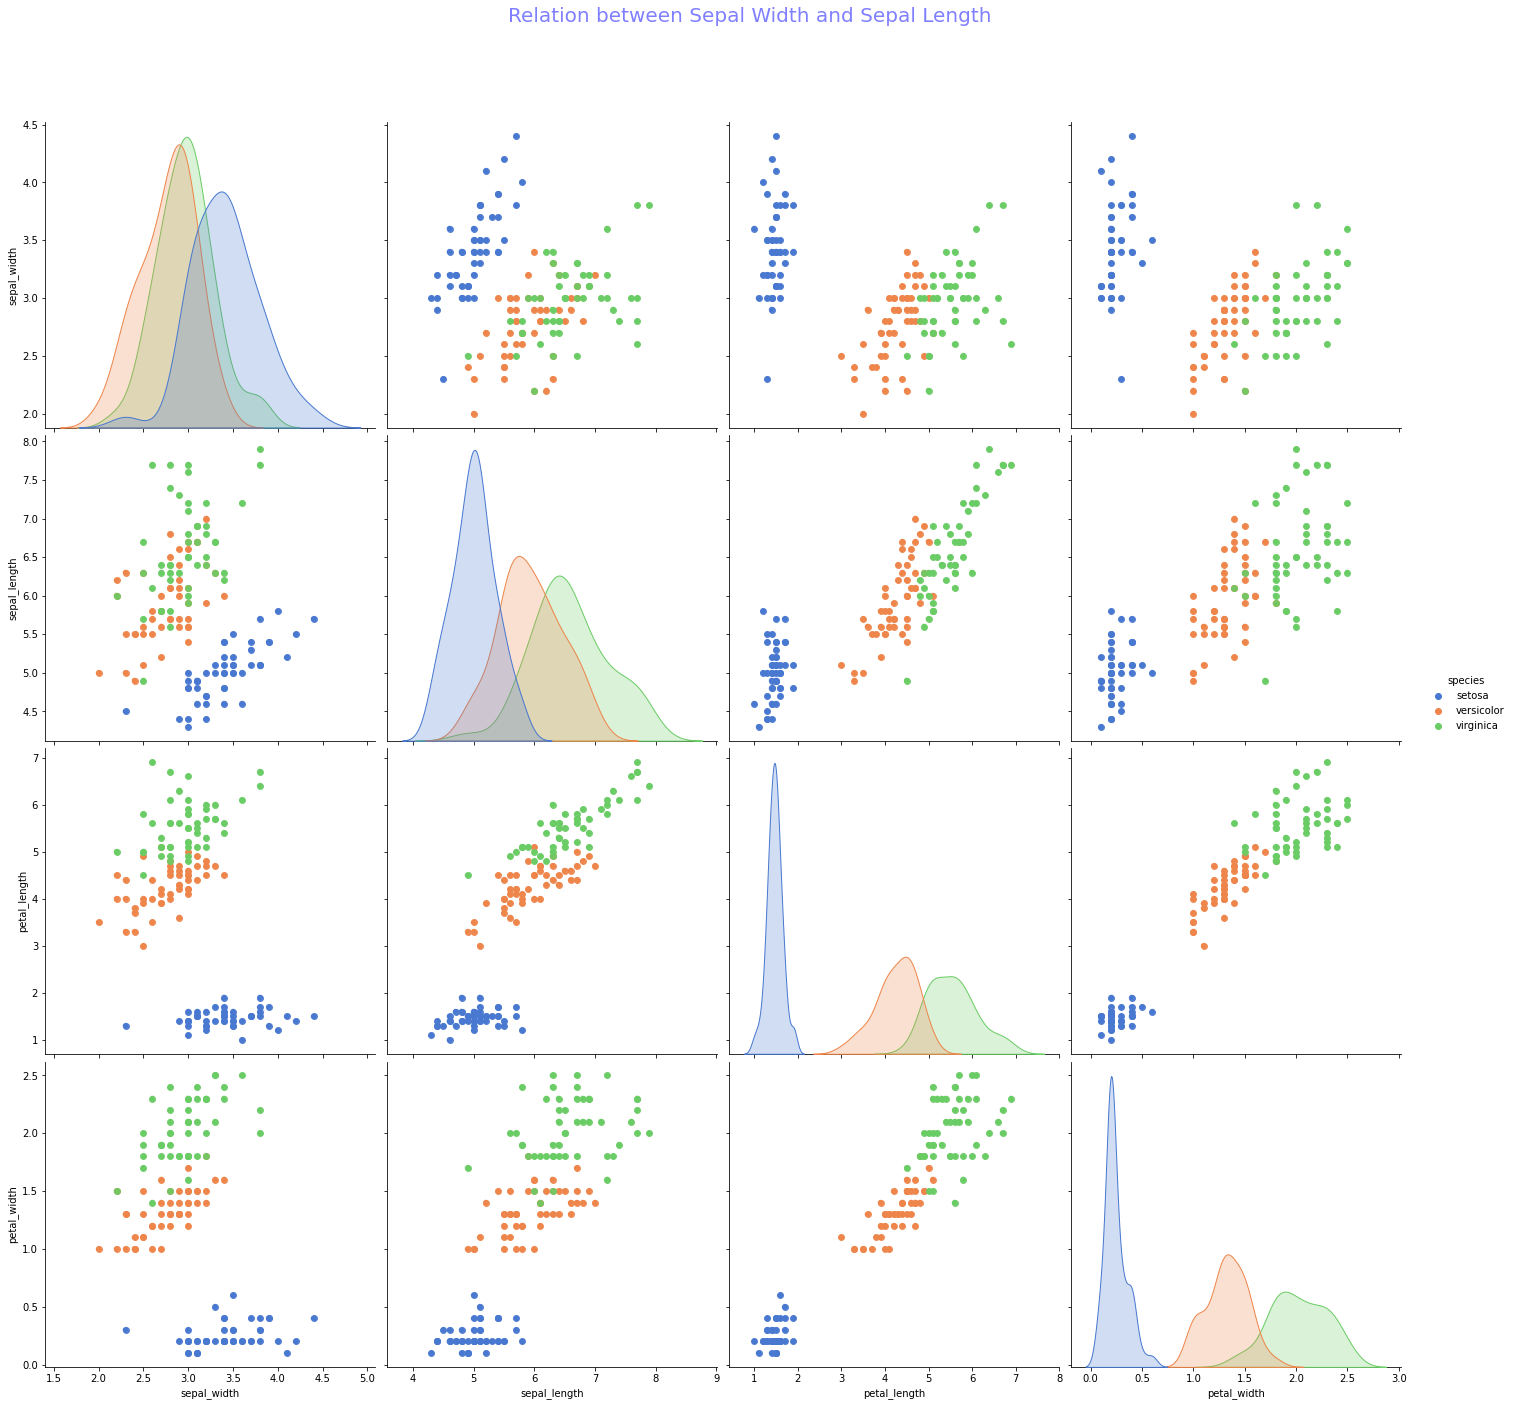

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

a=sns.pairplot(df,hue='species',palette="muted",height=5,vars=['sepal_width','sepal_length','petal_length','petal_width'],kind='scatter')

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#remove the top and the right lines
sns.despine()

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9)

#set the title of the graph
a.fig.suptitle('Relation between Sepal Width and Sepal Length',fontsize=20,color='b',alpha=0.5)

**시각화 자료 2**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



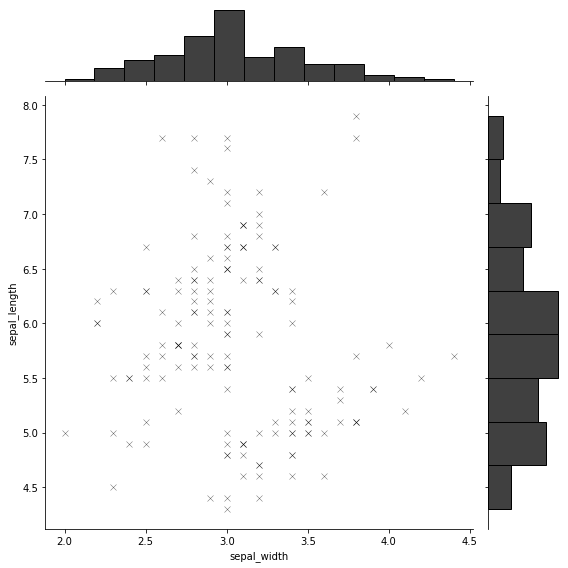

In [ ]:
import seaborn as sns

b=sns.jointplot(x='sepal_width', y='sepal_length', data=df, size=8, alpha=.6,color='k', marker='x')

## Plotly (전문가용 - 파이썬)

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1rHJeBR_-rQsTE_pTc-1oAjK2G7deVHNR) 

* 온라인 데이터 분석 및 시각화 프레임워크임. 파이썬 외에도 자바스크립 등 다양한 언어를 지원함

* Matplotlib에 비해 더 강력한 시각화 기능을 지원함. 그리고 Seaborn에서 지원하지 않는 **인터렉티브 기능**을 지원함 **(데이터 확대, 축소 등의 기능지원)**

### 인터렉티브 시각화 자료 예시

**인터렉티브 시각화 자료 1**

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

**인터렉티브 시각화 자료 2**

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# 시각화 기법 분류 방법

* 데이터 분석내용을 효율적으로 전달할려면 그에 따른 시각화 기법 종류(그래프의 종류)를 선택하는 것이 중요함

* 시각화 기법 종류를 선택하기 위해서는 일단 종류에 대해 알아야함. 따라서 분류 방법에 대해 공부하겠음

## 변수의 개수에 따른 분류

* 변수의 개수에 따라 분류하는 기준은 간단함 

* 변수가 한 개면 단변량(univariate), 두 개면 이변량(bivariate), 세 개 이상이면 다변량(multivariate) 데이터 시각화로 분류함



### 단변량(univariate) 데이터 시각화 방법

* 변수가 한 개로, 변수의 값을 x축과 같은 한 개의 축에 표시하면 단변량임

* 단변량 데이터 시각화 방법 중 가장 많이 쓰이는 것은 시각화 기법은 막대 차트(bar chart), 라인 차트(line chart), 파이 차트(pie chart)와 같은 기본 차트임

* 한 개의 축(axis)에 대응하는 데이터 값을 막대의 길이로 표현하는가, 선으로 이어서 표현하는가, 원의 넓이로 표현하는가에 따라 각각의 형태가 달라짐

* 가장 단순한 시각화 기법이기에 데이터 값의 크기를 직관적으로 파악할 수 있고, 누구나 쉽게 이해할 수 있음

![CSV Screenshot](https://drive.google.com/uc?export=view&id=12stpZjGZ39HP-mFPdAjWHuKqXS-MDF34) 


### 이변량(bivariate) 데이터 시각화 방법

  * 변수가 두 개로,  이변량 은 두 개의 축에 각각 대응하는 데이터 값을 표시하는 방법임. 예컨대 x축 및 y축과 같은 두 개의 축에 표시하면 이변량임

  * 대표적인 유형으로 산포도(scatterplot)가 있음. 
  
  * 산포도는 두 개의 변수 간 상관관계를 직관적으로 파악할 수 있는 장점이 있음. 데이터 포인트의 분포 패턴에 따라 양의 상관관계가 있는지, 음의 상관관계가 있는지, 아무런 상관관계가 없는지를 한눈에 알 수 있음

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1PMh3ly2P8sZZgePn5s9qia_3HF59rkoz) 






### 다변량(multivariate) 데이터 시각화 방법

* 변수가 3개 이상으로, 세 개 이상의 축에 표시하는 경우뿐만 아니라, 두 개의 축에 컬러 코딩과 같은 다른 방법을 더한 경우를 포함하는 시각화 방법임

* 대표적인 유형으로 버블 산포도임. 기존 산포도에 컬러 코딩을 추가한 것임

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1ZyeQYAiXi3SjHc9JICo9a0t_NdfFbh0P) 

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1iBIvt5ipvVsmstXANAJqt0uMRaOzgGZ6) 

![CSV Screenshot](https://drive.google.com/uc?export=view&id=1utA9kQ2aJgxt__uRwpUYoGIh6ruV1xFv) 

## 시각화의 목적에 따른 분류

* [차트의 기술(say it with charts,4th Edition)](https://www.amazon.com/Say-Charts-Executives-Visual-Communication/dp/007136997X)이란 책에 의하면 시각화의 목적을 5가지로 분류함:

  * 구성요소 비교

  * 항목 비교

  * 시간적 추이 비교

  * 도수분포 비교 

  * 상관관계 비교

* 본 수업에서는 이 분류법에 따라 시각화 기법 및 구현 방법에 대해 설명하겠음

# 구성요소 비교 유형

* 본 유형은 항목 별 값의 비중을 비교할 때 유용함(예: 여성 vs. 남성 학생 비율 비교)

* 예컨대 다음과 같은 내용을 발표할 때 본 유형의 시각화 기법을 사용하는 것이 적절함

  * 회사 어떤 제품의 매출액은 총매출액에서 30%를 넘었다.
  
  * 회사의 시장점유율은 5% 미만이었다.
  
  * 회사의 비즈니스 접대비가 전체 관리 비용의 25%를 넘다. 
  
  * A제품의 판매가 전체 1위를 차지했다.

* 위의 예와 같이 전달하고자 하는 주제가 '비율', '전체의 백분율', 'x%'를 차지하는 등의 단어를 포함한다면 본 유형의 시각화 기법을 사용하면 됨

* 본 유형의 대중적인 시각화 기법으로는 원그래프가 있음

## 원그래프/파이차트 (Pie graph)

* 원그래프 또는 파인차트는 데이터 분류나 항목의 비중(%)을 표현하고 싶을 때, 자주 사용하고 그래프임

### 그래프 예시

**그래프 #1: 타이타닉 데이터**

* 아래 원그래프는 타이타닉 데이터에서 티켓 클래스 별 탑승객 수 비중을 보여주고 있음

* 그래프를 보면 전체에서 3등석 탑승객의 비중이 가장 큰 것을 알 수 있음

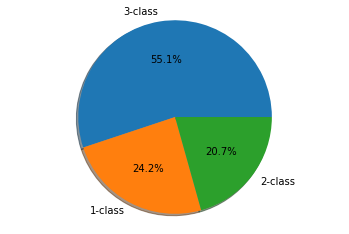

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df = getTitanicData()
pclass = df.Pclass.value_counts()

label = ['%s-class'%pclass for pclass in pclass.index] 

fig, ax = plt.subplots()
ax.pie(pclass, labels=label, autopct='%1.1f%%', shadow=True)
ax.axis('equal') 
plt.show()

* 파이 차트는 시리즈(표현하는 카테고리/범주)가 증가함에 따라 각 슬라이스(slice)가 작아짐 

* 결국에는 크기 구분이 명확하지 않게됨. 그래서 범주의 수가 9개 이상 경우는 사용하지 않음

**그래프 #2: 비행기 데이터**

* 아래는  월별 비행기 탁승객수 비중을 보여주는 원그래프로 범주(월) 수가 12개로 9개 이상임

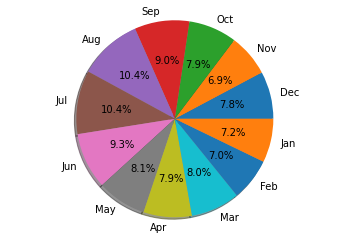

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def getFlightDataByMonth():
  df = getFlightData()
  df_by_month = df.groupby(by=['month']).sum()
  df_by_month['month'] = df_by_month.index
  df_by_month.month_num = df_by_month.month_num/len(df)*12
  df_by_month.set_index('month_num', inplace=True)
  df_by_month.sort_index(inplace=True, ascending=False)
  df_by_month.drop(columns=['year'], inplace=True)
  return df_by_month

df = getFlightDataByMonth()

fig, ax1 = plt.subplots()
ax1.pie(df.passengers, labels=df.month, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

### 코드 해설

* '그래프 1:타이타닉 데이터'의 파이썬 코드를 활용하여 원 그래프를 그리는 법을 배우겠음

* 참고로 본 그래프는 티켓 클래스 별 탑승객 수 비중(%)을 시각화함

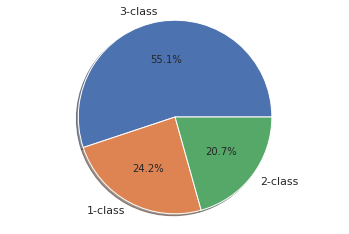

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df = getTitanicData()
pclass = df.Pclass.value_counts()

label = ['%s-class'%pclass for pclass in pclass.index] 

fig, ax = plt.subplots()
ax.pie(pclass, labels=label, autopct='%1.1f%%', shadow=True)
ax.axis('equal') 
plt.show()

* 원 그래프 시각화를 위해 사용하는 메서드는 matplotlib 라이브러리에 있는 matplotlib.pyplot.pie임

* 따라서 가장먼저 matplotlib.pyplot를 불어와야함(또는 import 해야함)

  * 시각화 도구를 설명 할 때 seaborn 라이브러리를 활용해서 시각화를 하는 방법을 배운다고 설명했었음

  * 따라서 matplotlib 라이브러리를 사용하는 것에 대해 의아해하는 리더들이 있을 것 같음

  * seaborn 라이브러리은 Matplotlib에 추가 기능을 사용할 수 있도록 하는 라이브러리임. 
  
  * 즉 스타크래프트 게임에 빗대어 설명하면 Matplotlib은 스타크래프트 오리지널이고 seaborn은 확장판인 스타크래프: 브러드 워이라고 생각하면 됨 


In [ ]:
# matplotlib.pyplot 라이브러리 불어오기
import matplotlib.pyplot as plt 

* 아래 코드는 그래프를 코랩 소스코드 결과창에 나오도로 설정함

In [ ]:
%matplotlib inline

* 다음으로 matplotlib.pyplot.pie 메서드에 들어가는 입력값을 준비해야함

  * pie 메서드에는 최소 입력값으로 (1)데이터과 (2) 레이블 이름 정보가 들어감

  * pie 메서드는 원 데이터값을 받아 자동으로 전체 합에서 각 데이터값의 비중(%)을 계산함

* 본 그래프는 티켓 클래스 별 탑승객 수 비중을 시각화함. 따라서 Pclass 컬럼에서 각 클래스의 빈도수를 계산한 후 데이터로 사용하면 됨


In [ ]:
# 타이타익 데이터 받기
df = getTitanicData() 

# 각 티켓 클래스의 빈도수 계산. 즉 티켓 클래스별 탁승객 수 계산
pclass = df.Pclass.value_counts() 

pclass.head()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* 레이블 이름 정도는 빈도수 계산 결과 데이터값 순서에 따라 레이블 이름을 넣어주면 됨

* 즉, 빈도수 계산 결과로 나오는 pclass 시리즈의 index를 레이블로 사용하면 됨

In [ ]:
# 원 그래프의 레이블 이름. pclass.index의 개별 값에 '-class'글을 더함  
label = ['%s-class'%pclass for pclass in pclass.index] 
label

['3-class', '1-class', '2-class']

* 입력값이 준비 되었으면 이제 그래프를 시각화하기 위한 설정을 해야함

* plt.subplots() 메서드는 (1) 그래프를 넣을 그림판(i.e., fig)과 (2) 그림판에 들어갈 그래프(i.e., ax)를 설정하여 제공함

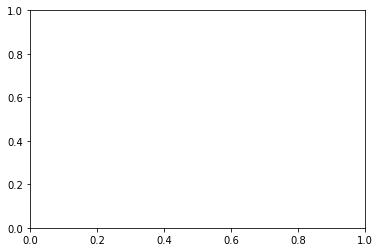

In [ ]:
fig, ax = plt.subplots()

* 이제 pie 메서드에 입력값을 넣으면 됨. 파이 그래프는 그림판에 그려짐. 따라서 ax.pie 메서드를 불러서 입력값을 넣음

In [ ]:
# autopct: 퍼센트 소수점 설정. 소수점 첫째자리까지 표시. # shadow: 그래프 그림자 표시

ax.pie(pclass, labels=label, autopct='%1.1f%%', shadow=True) 

([<matplotlib.patches.Wedge at 0x7f64dd93c6d8>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3-class'),
  Text(-0.5160762002061153, -0.9714243951954356, '1-class'),
  Text(0.8765111456658484, -0.6646263698677192, '2-class')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

* 타원형이 아닌 원을 그리고 위해서는 그래프의 가로, 세로 축의 길이를 같도록 해야 함. 가로 또는 세로 축이 다른 축보다 크면 타원형이 됨

* ax.axis 메서드에 'equal'을 넣으면 가로, 세로 축의 길이를 같게 조정해줌 

In [ ]:
# 가로, 세로 축 비율을 조정하여 길이를 같게 만듬(예: 2cm x 4cm => 2cm x 2cm) 
ax.axis('equal') 

(-1.110415878418142, 1.100496015606113, -1.134350102435046, 1.112420061514539)

* 원 그래프를 시각화 하기 위한 모든 준비가 끝났음. plt.show()를 불러 화면에 시각화하면 됨

In [ ]:
plt.show()

## 막대 그래프 (Bar chart)

* 막대 그래프는 데이터의 크고 작음을 한 눈에 파악할 수 있고 이해하기 가장 편리한다는 특징이 있음

* 막대 그래프를 쓸 때 항목이 적을수록 가로가 좋음. 반대로 항목이 많을수록 세로가 좋음


### 그래프 예시

**그래프 #1: 타이타닉 데이터**

* 아래 막대 그래프는 타이타닉 데이터에서 티켓 클래스 별 탑승객 수 비중(%)을 보여주고 있음

* 티켓 클래스의 항목 수는 3개임. 따라서 가로가 적당함

[Text(0.5, 0, 'Ticket class')]

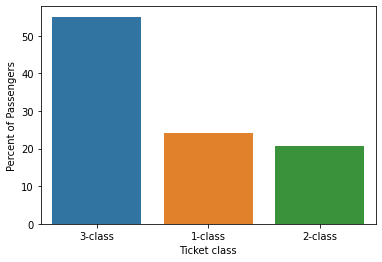

In [ ]:
import seaborn as sns
import pandas as pd

df = getTitanicData()

pclass = df.Pclass.value_counts()
pclass = pclass/pclass.sum()*100

pclass = pd.DataFrame({'Pclass': ['%s-class'%index for index in pclass.index], 'Percent of Passengers':pclass})

ax = sns.barplot(x="Pclass", y = 'Percent of Passengers', data=pclass)

ax.set(xlabel="Ticket class")

* 가로 그래프와 비교하기 위하여 세로 그래프를 만들어 보겠음

[Text(0, 0.5, 'Ticket class')]

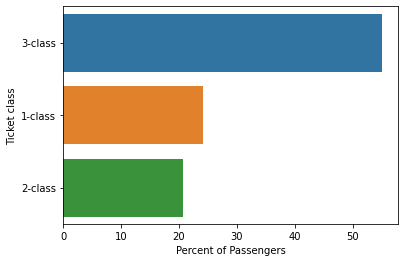

In [ ]:
import seaborn as sns

ax = sns.barplot(y="Pclass", x='Percent of Passengers', data=pclass)

ax.set(ylabel="Ticket class")

**그래프 #2: 비행기 데이터**

* 이번에는 월별 비행기 탑승객 수 비중(%)를 시각화 하겠음

* 월은 12 항목(1월~12월)이 있음. 항목 수가 크기에 세로로 시각화 하겠음

* 전체에서 7~8월 탑승객의 비중이 가능 큰 것을 알 수 있음

[Text(0, 0.5, 'Month'), Text(0.5, 0, 'Percent of Passengers')]

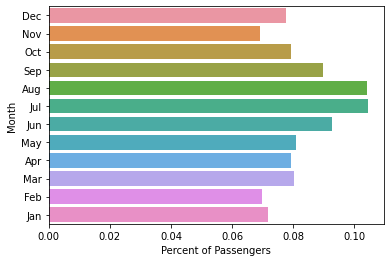

In [ ]:
import seaborn as sns

df = getFlightDataByMonth()
df['passengers'] = df['passengers']/df['passengers'].sum()

ax = sns.barplot(y = 'month', x="passengers", data=df)

ax.set(xlabel="Percent of Passengers", ylabel='Month')

* 비교를 위해 가로 그래프도 시각화하겠음

[Text(0, 0.5, 'Month'), Text(0.5, 0, 'Percent of Passengers')]

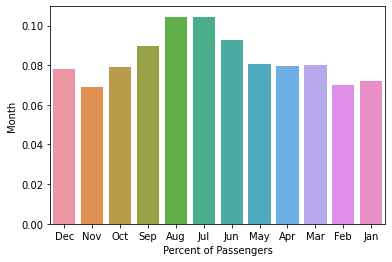

In [ ]:
import seaborn as sns

ax = sns.barplot(x = 'month', y="passengers", data=df)

ax.set(xlabel="Percent of Passengers", ylabel='Month')

###코드 해설

* '그래프 1:타이타닉 데이터'의 파이썬 코드를 활용하여 막대 그래프를 그리는 법을 배우겠음

* 참고로 본 그래프는 티켓 클래스의 항목 별 탑승객 수 비중(%)을 보여주고 있음



[Text(0.5, 0, 'Ticket class')]

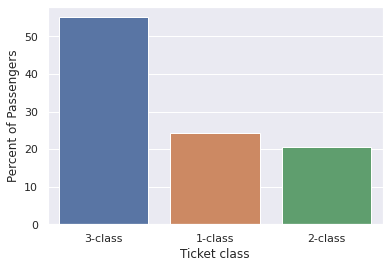

In [ ]:
import seaborn as sns
import pandas as pd

df = getTitanicData()

pclass = df.Pclass.value_counts()
pclass = pclass/pclass.sum()*100
pclass = pd.DataFrame({'Pclass': ['%s-class'%index for index in pclass.index], 'Percent of Passengers':pclass})

ax = sns.barplot(x="Pclass", y = 'Percent of Passengers', data=pclass)

ax.set(xlabel="Ticket class")

* 막대 그래프 시각화를 위해 사용할 크래스는 seaborn 라이브러리의 seaborn.barplot 메서드임

* 따라서 가장 먼저 seaborn 라이브러리를 import함. 이 라이브러리 외 필요한 라이브러리가 있으면 같이 import함

In [ ]:
import seaborn as sns # seaborn 라이브러리
import pandas as pd

* seaborn.barplot 메서드는 입력된 데이터값을 자동으로 각 대이터값의 **비중(%)으로 계산하지 않음**  

* 따라서 직접 코드로 비중을 계산해야함. 아래 코드는 클래스 별 빈도수를 계산 한 후 개별 클래스 별 비중(%)을 계산함

In [ ]:
# 클래스 별 빈도수를 보여주는 시리즈 데이터 생성
pclass = df.Pclass.value_counts()
pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# 클래스 별 빈도수에 전체 클래스 수를 나누고 100을 곱해 퍼센트 계산
pclass = pclass/pclass.sum()*100
pclass

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

* 클래스 별 비중 데이터를 사용하여 데이터프레임 생성

In [ ]:
pclass = pd.DataFrame({'Pclass': ['%s-class'%index for index in pclass.index], 
                       'Percent of Passengers':pclass})
pclass

,Pclass,Percent of Passengers
3,3-class,55.106622
1,1-class,24.242424
2,2-class,20.650954


* seaborn.barplot 메서드를 사용하여 막대 그래프 시각화함
* 메서드에 입력값으로 생성된 데이터프레임을 넣고, x축 y축의 대응하는 컬럼 이름을 설정함

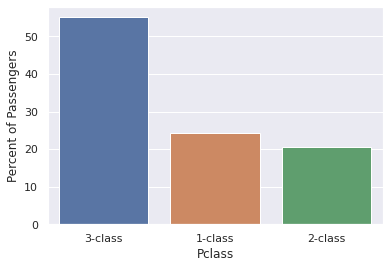

In [ ]:
ax = sns.barplot(x="Pclass", y = 'Percent of Passengers', data=pclass)

* 아래 코드 처럼 x축, y축에 대응하는 컴럼 이름을 서로 교체해주면 다른 유형의 막대 그래프가 됨(예: 가로형 막대 그래프 -> 세로형 막대 그래프)

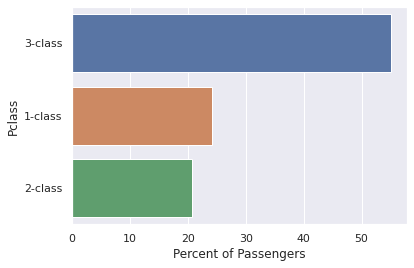

In [ ]:
ax = sns.barplot(x='Percent of Passengers', y = "Pclass", data=pclass)

* 마지막으로 x/y 축 이름 설정함. 입력값으로 xlabel을 넣으면 x축 이름이 변경됨. ylabel을 넣으면 y축 이름이 변경됨

[Text(0, 0.5, 'Ticket class')]

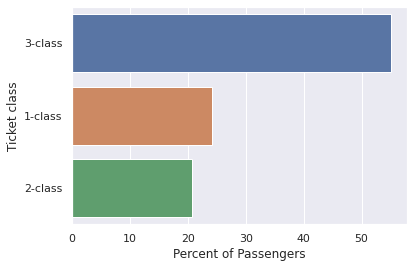

In [ ]:
ax = sns.barplot(x='Percent of Passengers', y = "Pclass", data=pclass)
ax.set(ylabel="Ticket class")

# 항목 비교 유형

* 본 유형은 대상의 순위를 비교할 때 유용함(예: 성적 등수) 

* 예컨대 다음과 같은 내용을 발표할 때 본 유형의 시각화 기법을 사용하는 것이 적절함

  * 2020년 회사의 매출액은 전체 시장중 3위를 차지했다.
  
  * 4월에 A제품의 판매가 B,C제품의 판매에 비해 많았다.
  
  * 고객의 판매수익률은 4위를 차지했다.

* 위의 예와 같이 "많다", "적다", "x등"과 같은 표현을 해야할 때 항목 비교 유형을 사용하면 됨

* 본 유형의 대중적인 시각화 기법으로는 막대 그래프가 있음


## 막대 그래프 (Bar chart)

* 막대 그래프는 데이터의 크고 작음을 한 눈에 파악할 수 있고 이해하기 가장 편리한다는 특징이 있음

* 막대 그래프를 쓸 때 항목이 적을수록 가로가 좋음. 반대로 항목이 많을수록 세로가 좋음


### 그래프 예시


**그래프 #1: 타이타닉 데이터**

* 아래 막대 그래프는 타이타닉 데이터에서 티켓 클래스 별 탑승객 수를 보여주고 있음. 비중(%)을 보여주는게 아님

* 그래프를 보면 3등석 탑승객이 가장 많으며 1, 2등석 탑승객의 수는 비슷한 것을 알 수 있음

[Text(0, 0.5, 'Number of passengers'), Text(0.5, 0, 'Ticket class')]

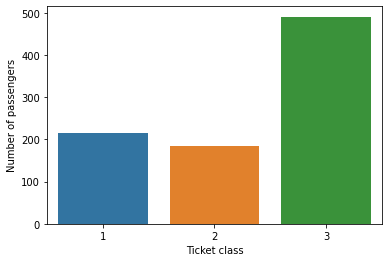

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.countplot(x="Pclass", data=df)

ax.set(xlabel="Ticket class", ylabel='Number of passengers')

* 아래 막대 그래프는 티켓 클래스 별 탑승객 평균 나이를 보여주고 있음

* 막대 그래프에서 검은색 선은 신뢰 구간(confidence interval)을 보여주고 있음

[Text(0, 0.5, 'Average number of passengers'), Text(0.5, 0, 'Ticket class')]

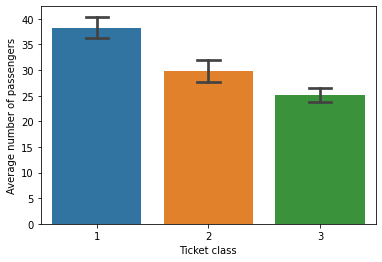

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.barplot(x='Pclass', y='Age', data=df, capsize=.2)

ax.set(xlabel="Ticket class", ylabel='Average number of passengers')

* 아래 막대 그래프는 티켓 클래스 + 성별 별 탑승객 평균 나이를 보여주고 있음

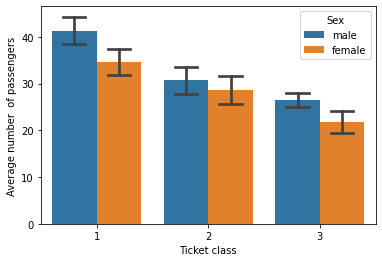

In [ ]:
import seaborn as sns

ax = sns.barplot(x='Pclass', y='Age', hue='Sex', data=df, capsize=.2)

ax.set(xlabel="Ticket class", ylabel='Average number of passengers');

**그래프 #2: 비행기 데이터**

* 아래 막대 그래프는 월별 탁승객의 평균 수를 보여주고 있음 

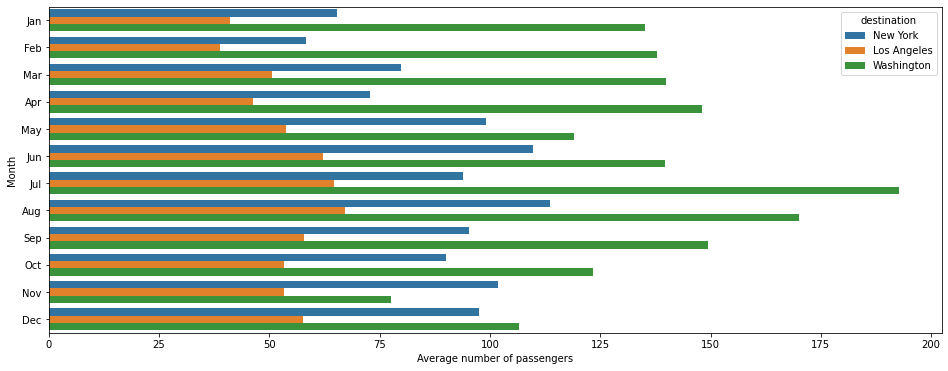

In [ ]:
import seaborn as sns

df = getFlightData()

plt.figure(figsize=(16, 6))

ax = sns.barplot(y = 'month', x="passengers", hue='destination', data=df, ci=None)

ax.set(ylabel="Month", xlabel='Average number of passengers');

### 코드 해설

* 그래프 #2(비행기 데이터)는 그래프 #1(타이타닉 데이터)보다 크기가 큼

* 벌써 막대 그래프를 시각화하는 방법에 대해서 배웠음. 따라서 이전에 배우지 않음 설정법만 알려주겠음



* 각 항목별 데이터값의 갯수가 2개 이상이면 자동으로 검은색 선으로 신뢰 구간을 표시함

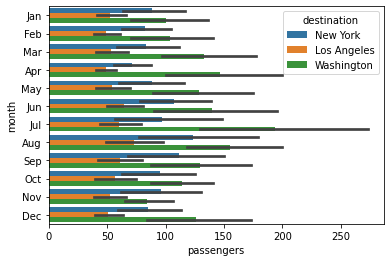

In [ ]:
import seaborn as sns

df = getFlightData()

ax = sns.barplot(y = 'month', x="passengers", hue='destination', data=df)

* 신뢰 구간을 표시하지 않고 싶다면 ci입력값을 None으로 하면됨

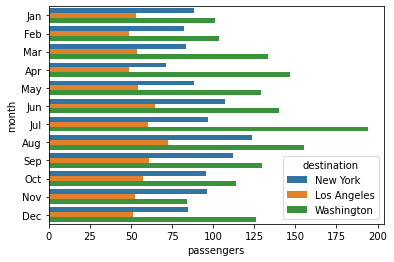

In [ ]:
ax = sns.barplot(y = 'month', x="passengers", hue='destination', data=df, ci=None)

* 그래프 크기는 plt.figure 메서드의 figsize 입력값을 넣어서 설정할 수 있음

* 아래처럼 figsize 입력값으로 가로, 세로 크기를 튜플로 넣어면 됨

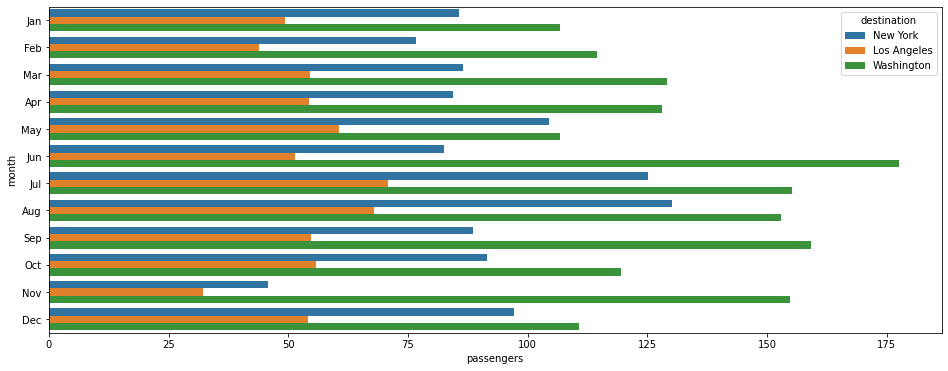

In [ ]:
plt.figure(figsize=(16, 6)) # 그래프 사이즈 설정
ax = sns.barplot(y = 'month', x="passengers", hue='destination', data=df, ci=None)

## 방사형 그래프 (Rader graph)

* 방사형 그래프는 일반적으로 다차원 데이터에 적합함. 예컨대 어떤한 항목이 유사한 값을 갖는지 또는 극단값이 있는지를 보여줄 수 있음

* 또한 데이터의 어떤 변수가 더 높거나 더 낮은 값을 가지는지 파악하는 데 도움됨 

### 그래프 예시


* 방사형 그래프에서는 시각화하는 변수들의 최대값이 같아야 효과적임

* 이러한 변수들의 대표적인 예가 FIFA 게임에서 선수들의 능력치임. 능력치의 최대값은 다 같음

* 타이타닉 데이터에는 이러한 데이터가 없음. 따라서 포켓몬 캐릭터 데이터를 사용하여 방사형 그래프를 시각화 해보겠음

* 다음 링크에서 포켓몬 데이터 CSV파일을 다운 받은 후 자신의 구글 드라이브에 업로드 해서 사용하면 됨(다운로드 링크: [https://drive.google.com/drive/folders/1s_E9_FtwEyI2e82c0z-zI6pg4u26_uY0?usp=sharing](https://drive.google.com/drive/folders/1s_E9_FtwEyI2e82c0z-zI6pg4u26_uY0?usp=sharing))


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/6. 수업/바이오 데이터 엔지니어 양성사업/6. 데이터 시각화/data/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


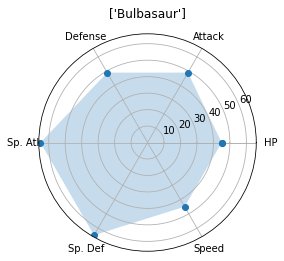

In [ ]:
labels=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
stats=df.loc[0,labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)
ax.set_title([df.loc[0,"Name"]]);

### 코드 해설

* 방사형 그래프 시각화는 matplotlib와 seaborn에서 기본으로 제공하는 시각화 방법이 아님

* 따라서 극좌표계 그래프 시각화 및 도형 그리기 기능을 사용해서 만들어야함. 방사형 그래프를 만드는 방법은 다음과 같음: 



1. **데이터 준비**: 시각화 데이터, 레이블 이름 정보

  * 시각화 데이터의 데이터값 수는 레이블 수와 동일함. 예컨대 레이블이 2개(A능력, B능력)라면 데이터값도 2개 필요함 

In [ ]:
# 레이블 정보 생성
labels=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# 시각화 데이터 생성
stats=df.loc[0,labels].values

  2. **극좌표계 그래프 시각화**



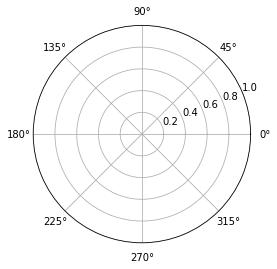

In [ ]:
# 그래프를 시각화해서 넣을 그림판 설정
fig = plt.figure()

# 극좌표계 그래프 시각화. polar 입력값에 True를 넣으면 극좌표계 그래프가 시각화됨
ax = fig.add_subplot(111, polar=True)

3. **방사형 그래프 선 그리기**
 
  * 항목이 3개 이상이면 방사형 그래프 선의 수는 항목의 수와 같음. 예컨대 항목이 5개면(오각형) 선을 5개 그리면 됨
 
  * Matplotlib.axes.Axes.plot() 메써드를 각 선이 만나는 좌표를 넣으면 순서대로 넣으면 됨 선을 그리면 됨

  * 참고로 극좌표계에서 x축은 라디안(최대값 = 2*np.pi)임. y축은 일반 그래프와 동일함


In [ ]:
# 각선이 만나는 x좌표 계산. 좌표를 계산하는 방법은 다음과 같음 
# 먼저 좌표 최대값(2π)을 동일한 크기로 항목 수 만큼 분할하는 위치(분점)의 좌표를 계산함
# 다음으로 계산된 좌표에서 가장 처음 분점의 좌표를 마지막에 추가하면 됨
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

# y좌표 계산
stats=np.concatenate((stats,[stats[0]]))

# x, y 좌표를 넣어 선을 그림
# 'o-': 선과 좌표점을 모두 그림, 'o': 점만 그림, '-': 선만 그림
# linewidth: 선 굵기
ax.plot(angles, stats, 'o-', linewidth=2)

4. **극좌표계의 격자선과 해당 선의 레이블 이름 설정**

In [ ]:
ax.set_thetagrids(angles * 180/np.pi, labels)

(<a list of 14 Line2D ticklines objects>,
 <a list of 7 Text major ticklabel objects>)

5. **도형 색 칠하기**
  * 입력된 좌표에 따라 도형을 그린 후 색을 넣음. 


In [ ]:
# alpha: 색 투명도
ax.fill(angles, stats, alpha=0.25)

6. **극좌표계의 격자선 라인 표시**

In [ ]:
ax.grid(True)

7. **그래프 이름 설정**

In [ ]:
ax.set_title([df.loc[0,"Name"]]);

# 시간적 추이 비교 유형

* 본 유형은 시간에 따라 변화를 표현할 때 유용함(예: 연대별 신생아 수)

* 각 부분의 크기 또는 순위가 아니라, 시간에 따라 어떻게 변화하는지에 보여주는 것이 주 목적임

* 원하는 기간대을 설정하여 표현할 수 있음. 예컨대 주/달/분기/년도 별 변화에 해당되는 데이터를 대상으로 상승, 하강, 파동, 유지하는 동향을 표현 할 수 있음 

* 예컨대 다음과 같은 내용을 발표할 때 본 유형의 시각화 기법을 사용하는 것이 적절함

  * 회사 매출액은 3월부터 꾸준히 떨어졌다.
  
  * 지난 5년돈안의 투자수익률은 점점 하락되었다.
  
* 위의 예와 같이 “변화”, “증가”, “하락”, “성장”, “하강” 등과 같은 표현을 해야할 때 항본 유형을 사용하면 됨

* 본 유형의 대중적인 시각화 기법으로는 선 그래프가 있음


## 선 그래프 (Line graph)


* 시간의 흐름이나 순서 변화에 따라 데이터값을 변화를 쉽게 알 수 있음. 따라서 연속 시간 간격 또는 시간 범위에 걸친 데이터의 변화를 보여주는 데 사용됨



### 그래프 예시

**그래프 비행기 데이터** 

* 시간 순 데이터는 비행기 데이터에만 있음. 그래서 비행기 데이터만을 활용해서 선 그래프를 그리겠음

* 아래 그래프는 연도별 **평균** 탑승객 수를 보여주고 있음

* 목적지에 상관 없이 매해 평균 탑승객의 수가 증가하는 것을 알 수 있음

In [ ]:
df = getFlightData()
df.head()

,year,month,month_num,destination,passengers
0,1949,Jan,1,New York,8
1,1949,Jan,1,Los Angeles,7
2,1949,Jan,1,Washington,97
3,1949,Feb,2,New York,18
4,1949,Feb,2,Los Angeles,15


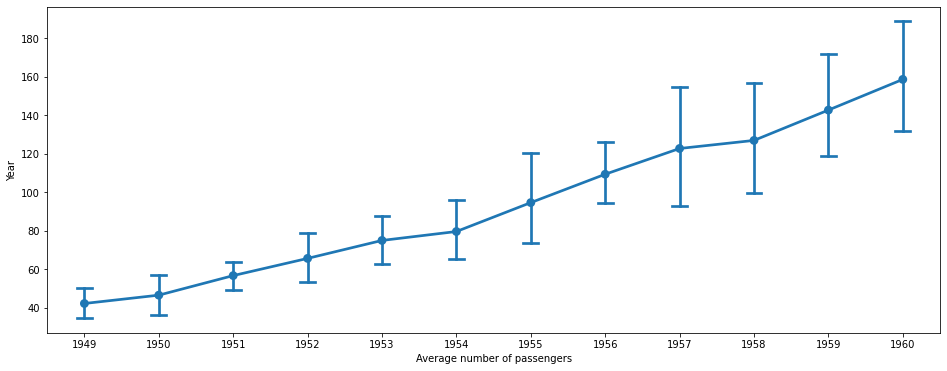

In [ ]:
plt.figure(figsize=(16, 6))

ax = sns.pointplot(x='year', y='passengers', data=df, capsize=0.2)

ax.set(ylabel="Year", xlabel='Average number of passengers');

* 아래 그래프는 연도별 탑승객 수를 보여주고 있음

* 매해 전체 탑승객 수가 증가하는 것을 알 수 있음

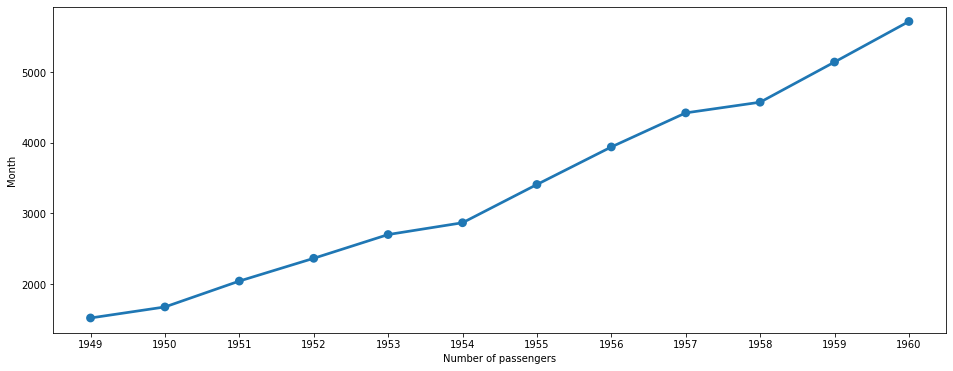

In [ ]:
def getFlightDataByYear():
  df_by_year= getFlightData().groupby(by=['year']).sum()
  df_by_year['year'] = df_by_year.index
  df_by_year.drop(columns=['month_num'], inplace=True)
  return df_by_year

df = getFlightDataByYear()

plt.figure(figsize=(16, 6))

ax = sns.pointplot(x='year', y='passengers', data=df, capsize=0.2)

ax.set(ylabel="Month", xlabel='Number of passengers');

* 아래 그래프는 연도, 출발지 별 탑승객 수를 보여주고 있음

* 목적지에 상관없이 매해 탑승객 수는 증가하는데 특히 위싱턴행 비행기 탑승객 수가 다른 목적지행 탑승객 수보다 증가율이 더 큼

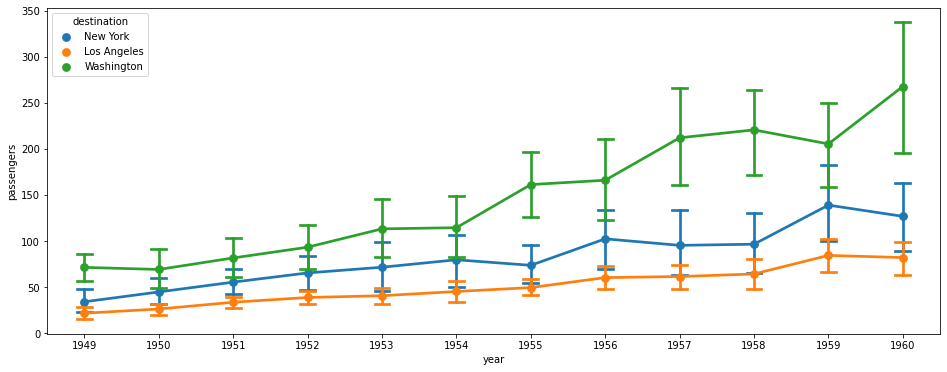

In [ ]:
df = getFlightData()

plt.figure(figsize=(16, 6))

sns.pointplot(x='year', y='passengers', hue='destination', data=df, capsize=0.2)

ax.set(ylabel="Year", xlabel='Number of passengers');

### 코드 해설

* 선 그래프 시각화 방법은 막대 그래프 시각화 방법과 같음. 메서드만 다름

* 선 그래프 시각화 시 사용하는 메서드는 seaborn.pointplot 임

* 해당 메서드에 입력갑승로 데이터를 설정해 준 후, x, y축 데이터에 해당하는 컬럼 이름을 넣으면 됨

* 만약 축이 선이 여러개 있다면 각 선의 종류(항목) 정보를 담고 있는 컬럼을 hue에 설정하면 됨 

* 검은색 선으로 신뢰 구간의 양끝을 'T'모양으로 만들고 싶으면 'T'의 윗선의 길이를 capsize에 설정해야함. 

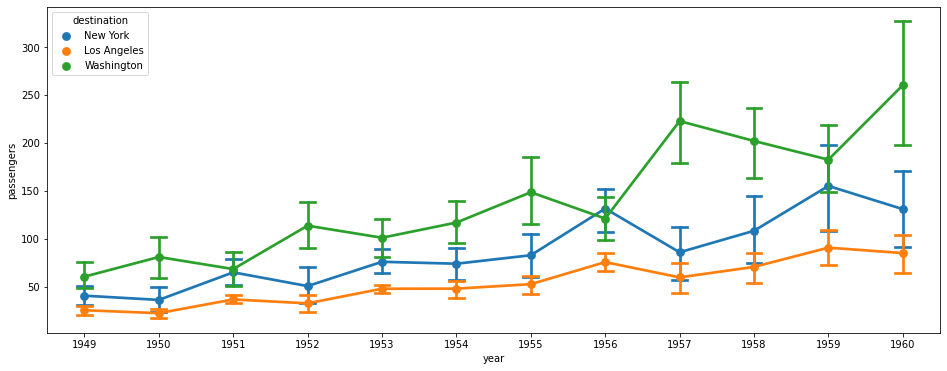

In [ ]:
df = getFlightData()

plt.figure(figsize=(16, 6))

# hue: 각 선의 항목 설정, capsize: 신뢰구간 양끝선의 길이 설정
sns.pointplot(x='year', y='passengers', hue='destination', data=df, capsize=0.2)

ax.set(ylabel="Year", xlabel='Number of passengers');

# 도수분포 비교 유형

* 본 유형은 데이터의 분포를 몇 개의 구간으로 나눈 후 각 구간에 해당하는 데이터값의 빈도를 표현할 때 유형함

* 예를 들면 3만 달러 미만을 버는 직원은 몇 명인지, 3만 달러 이상 5만 달러 미만을 버는 직원은 몇명인지 등임

* 예컨대 다음과 같은 내용을 발표할 때 본 유형의 시각화 기법을 사용하는 것이 적절함

  * 회사 2월 이후 매출액은 10000달러-20000달러 범위애 있다.

  * 회사 직원의 연령분포는 경쟁사와 크게 다르다.

* 본 유형의 대중적인 시각화 기법으로는 히스토그램이 있음

## 히스토그램 

* 가로축(x축)은 구간을 나타내고, 세로축(y축)은 각 구간별 빈도수를 나타냄

### 그래프 예시

**타이타닉 데이터**

* 나이 분포 별 탑승객의 나이 빈도수를 보여줌


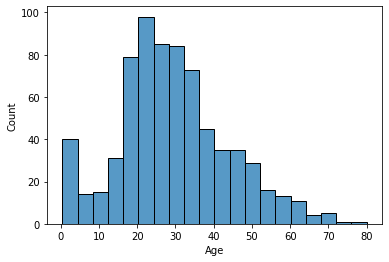

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.histplot(data=df, x="Age")

* 아래 그래프는 트렌드선도 함께 보여주고 있음

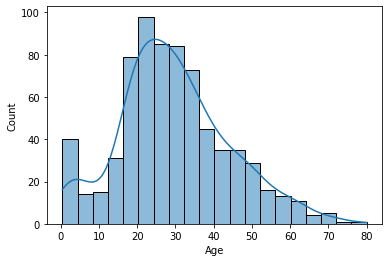

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.histplot(data=df, x="Age", kde=True)

* 각 범위의 크기를 10살로 한 후 각 분포 별 빈도수를 보여줌

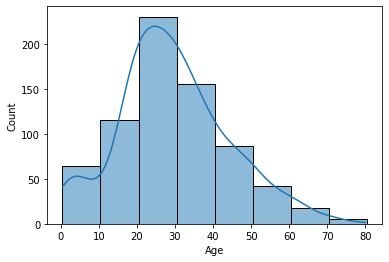

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.histplot(data=df, x="Age", binwidth=10, kde=True)

* 각 범위의 크기를 10살로 한 후 각 분포, 성별 빈도수를 보여줌

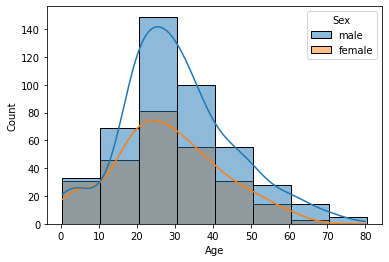

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.histplot(data=df, x="Age", hue='Sex', binwidth=10, kde=True)

### 코드 설명

* 히스토그램을 시각화할 때는 seaborn.histplot 메서드를 사용하면 됨

* 본 메서드에 입력값으로 데이터와 x축에 대응하는 컬럼 이름을 넣어주면 자동으로 히스토그램을 그려줌

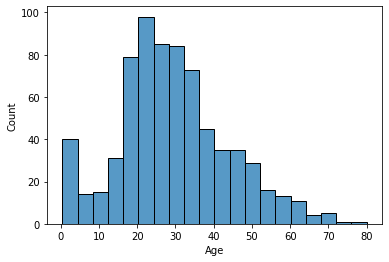

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.histplot(data=df, x="Age")

* 트렌드 선을 그리고 싶으면 kde를 True로 설정함

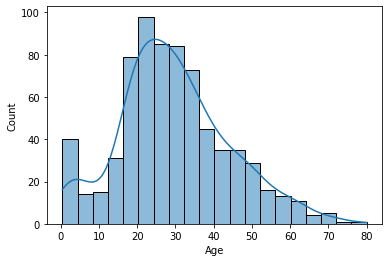

In [ ]:
ax = sns.histplot(data=df, x="Age", kde=True)

* 막대의 수를 수정하고 싶으면 bins 입력값을 설정하면 됨

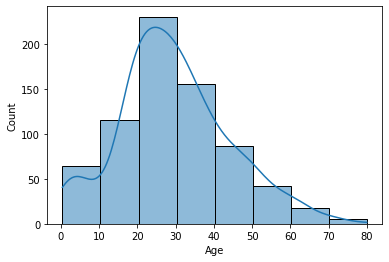

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.histplot(data=df, x="Age", bins=8, kde=True)

* 개별 막대의 크기를 수정하고 싶으면 binwidth 입력값을 설정하면 됨

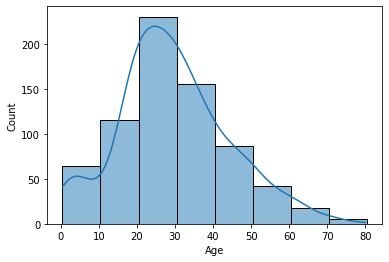

In [ ]:
import seaborn as sns

df = getTitanicData()

ax = sns.histplot(data=df, x="Age", binwidth=10, kde=True)

* 여러 히스토그램을 함께 그리고 싶다면 각 히스토그램의 항목 정보를 표시한 컬럼 이름을 hue에 설정함

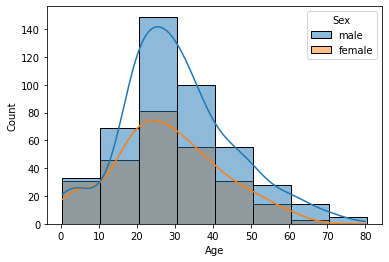

In [ ]:
ax = sns.histplot(data=df, x="Age", hue='Sex', binwidth=10, kde=True)

# 상관관계 비교 유형

* 본 유형은 변수 두개의 사이를 표현할 때 유용함(예: '매출액'이 증가할 수록 '이윤'도 증가)

* 예컨대 다음과 같은 내용을 발표할 때 본 유형의 시각화 기법을 사용하는 것이 적절함

 * 2월의 판대실적에 보면 매출액은 판매원의 경험과 직접적 관계가 없는 것을 보여준다

 * CEO의 연봉은 기업의 규모에 따라 변화하다

* 위의 예와 같이 "\~따라 증가하다", "\~에 따라 감소하다", "\~에 따라 변화하다" , "\~에 관련하다" 등과 과 같은 표현을 해야할 때 항목 비교 유형을 사용하면 됨

*  본 유형의 대중적인 시각화 기법으로는 산점도가 있음




## 산점도 (Scatter graph)

 데이터점의 분포를 살펴봄으로써 변수 간의 상관성을 초혼할 수 있습니다. 변수 간의 상호 관계가 존재하지 않으면 산점도에서는 이산점을 랜덤하게 분포하는 것으로 표현되다는 반면에 어떤 연관성이 있으면 대부분의 데이터점은 상대적으로 밀집되어 어떤 추세로 나타날 것입니다.

### 그래프 예시

**타이타닉 데이터**

* 탑승객 나이와 티켓가격의 관계를 보여주고 있음. 두 변수 사이에 아무 관계가 없을 것을 알 수 있음 

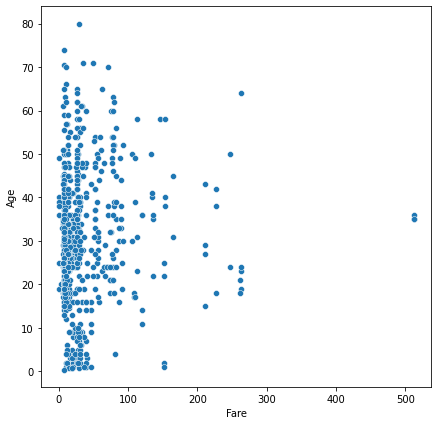

In [ ]:
import seaborn as sns

df = getTitanicData()

plt.figure(figsize=(7, 7))

sns.scatterplot(data=df, x="Fare", y="Age")

* 탑승객 나이, 티켓 가격, 성별 사이의 관계를 보여주고 있음

* 나이가 적을 수록 싼 가격을 구입한 탑승객의 생존율이 높았음

* 나이가 많을 수록 비싼 가격을 구입한 탑승객의 생존 율이 높았음


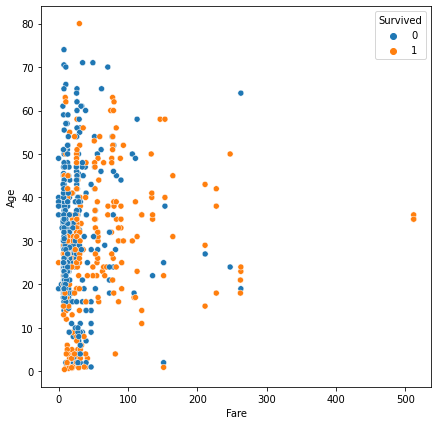

In [ ]:
plt.figure(figsize=(7, 7))

sns.scatterplot(data=df, x="Fare", y="Age", hue='Survived')

* 탑승객 나이, 티켓 가격, 성별, 티켓 클래스 사이의 관계를 보여주고 있음

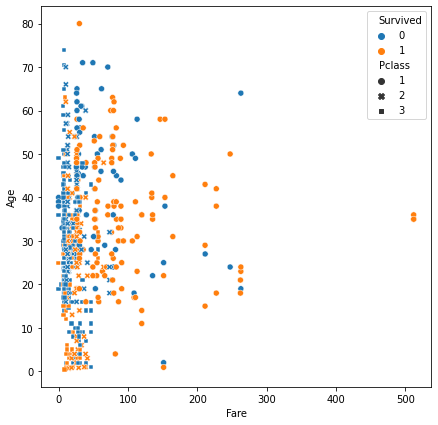

In [ ]:
plt.figure(figsize=(7, 7))

sns.scatterplot(data=df, x="Fare", y="Age", hue='Survived', style='Pclass');

### 코드 설명

* 산점도 시각화시 사용하는 메서드는 seaborn.scatterplot임

* 기존에 사용했던 seaborn의 시각화 메소드와 사용하는 방법이 동일함


* 점의 모양을 다르게 해서 축을 한개 더 추가 할 수 있음(총 4개). 축을 한개 더 추가할 때 style에 축 정보를 담고 있는 컬럼 이름을 설정하면 됨  

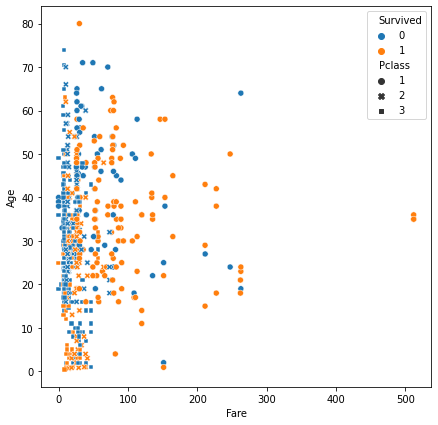

In [ ]:
plt.figure(figsize=(7, 7))

sns.scatterplot(data=df, x="Fare", y="Age", hue='Survived', style='Pclass');

## 열지도 (Heatmap)

* 열지도는 밀집한 점데이터를 가장 표현하는 시각화 기법임

* 값을 크기를 색으로 표현함(예: 숫자가 커질 수록 어두운색으로 표현) 

### 그래프 예시

* 아래는 성별, 티켓 클래스 별 생존자 수를 시각화하고 있음 

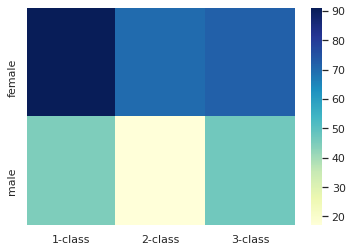

In [ ]:
import seaborn as sns; sns.set_theme()

df = getTitanicData()

df= df[df.Survived == 1]

df = df.groupby(by=['Sex','Pclass']).sum()

df = pd.DataFrame([df.loc['female'].Survived.values, df.loc['male'].Survived.values], 
                  index = ['female', 'male'], 
                  columns=['1-class','2-class', '3-class'])

ax = sns.heatmap(df, cmap="YlGnBu")

### 코드 설명

* 열지도를 시각화 할 때 사용하는 메소그는 seaborn.heatmap 임

* 본 메서드에 데이터를 입력값으로 넣으면 index를 x축으로 사용하고 컬럼 이름을 y축으로 사용함

* 따라서 가장 먼저 데이터를 생성해야 함. 쉽게 데이터를 생성하는 방법 중 한개는 DataFrame.groupby 메서드를 사용하는 것임
  
  * by 입력에 데이터를 무리 지을 때 사용할 컬럼 이름 정보를 설정함

  * 무리를 지은 후 무리에 속한 데이터값을 더하도록 설정함

In [ ]:
import seaborn as sns; sns.set_theme()

# 타이타닉 데이터 호출
df = getTitanicData()

# 생존자 데이터 
df= df[df.Survived == 1]

# 'Sex','Pclass'값에 따라 데이터값을 그룹 지어준 후 각 그룹의 합을 계산함
df = df.groupby(by=['Sex','Pclass']).sum()

df.head()

PassengerId  Survived      Age       Fare
Sex    Pclass                                           
female 1             43131        91  2865.00  9644.0125
       2             31135        70  1909.50  1560.2292
       3             25854        72   908.50   897.4459
male   1             23750        45  1449.92  3358.6794
       2              7065        17   240.33   358.6167

  * 다음으로 필요한 데이터만 가진 DataFrame 데이터를 생성함 

In [ ]:
df = pd.DataFrame([df.loc['female'].Survived.values, df.loc['male'].Survived.values], 
                  index = ['female', 'male'], 
                  columns=['1-class','2-class', '3-class'])
df.head()

,1-class,2-class,3-class
female,91,70,72
male,45,17,47


* 마지막으로 heatmap 메서드에 데이터값을 넣음

In [ ]:
ax = sns.heatmap(df, cmap="YlGnBu")